In [ ]:
# This file contains the code for the SIR model for the spread of a disease in a town having 5 localities

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Class to store the state of a locality
class locality:
    def __init__(self, infected, susceptible): 
        self.infected = infected
        self.susceptible = susceptible
        self.recovered = 0
    def __str__(self): # for printing the state of the locality
        return "Infected: " + str(self.infected) + ", Susceptible: " + str(self.susceptible) 
    
# Parameters
RECOVERY_RATE = 0.001
INFECTION_RATE =  0.01
DAYS = 1000

# initialising the localities
loc1 = locality(5, 10000)
loc2 = locality(5, 10000)
loc3 = locality(5, 10000)
loc4 = locality(5, 10000)
loc5 = locality(5, 10000)

# list of localities
localities = [loc1, loc2, loc3, loc4, loc5]

# function to transport people from locality i to locality j
def naive_transport(locality1, locality2, transport_matrix,i,j):
    transport_rate = transport_matrix[i][j]
    temp1 = int(locality2.infected * transport_rate)
    temp2 = int(locality2.susceptible * transport_rate)

    locality1.infected += temp1
    locality2.infected -= temp1
    locality1.susceptible += temp2
    locality2.susceptible -= temp2

def quarantined_transport(locality1, locality2, transport_matrix, i, j):
    transport_rate = transport_matrix[i][j]
    locality1.susceptible -=  int(locality2.susceptible * transport_rate)
    locality2.susceptible += int(locality2.susceptible * transport_rate)

def infection(locality, infection_rate):    
    temp = int(locality.susceptible * infection_rate)
    locality.susceptible -= temp
    locality.infected += temp

def recovery(locality, recovery_rate):
    temp = int(locality.infected * recovery_rate)
    locality.infected -= temp
    locality.recovered += temp

def generate_tm():
    # transport_matrix = np.zeros((5,5))
    # for a in range(5):
    #     for b in range(5):
    #         if a != b:
    #             transport_matrix[a][b] = random.random()

    transport_matrix = np.full((5,5), 0.2)
    for t in range(5):
        transport_matrix[t][t] = 0

    return transport_matrix

# the no. of people transported from locality i to locality j is calculated 
# as the product of the infected population in locality i and the proximity
# between locality i and locality j

def update_populations(localities, infection_rate, transport_method_obj):
    for i in range(len(localities)):
        for j in range(len(localities)):
            if i != j:
                transport_method_obj(localities[i], localities[j], generate_tm(), i, j)
                infection(localities[j], infection_rate)
                recovery(localities[j], RECOVERY_RATE)
                
    return localities

def simulate(localities, infection_rate, days):
    for i in range(days):
        
        # print to check the working of the model 

        # print("Day " + str(i) + ":")
        # for locality in localities:
        #     print(locality)
        # print()
        
        localities = update_populations(localities, infection_rate, naive_transport)
        sim_frac = i/days
        if sim_frac > 0.5:
            localities = update_populations(localities, infection_rate, quarantined_transport)
        yield localities

history = simulate(localities, INFECTION_RATE, DAYS)

sus = []
inf = []
rec = []

# Plotting the results
for i in range(DAYS):
    for count in range(len(localities)):
        sus.append(localities[count].susceptible)
        inf.append(localities[count].infected)
        rec.append(localities[count].recovered)
    localities = next(history)
    


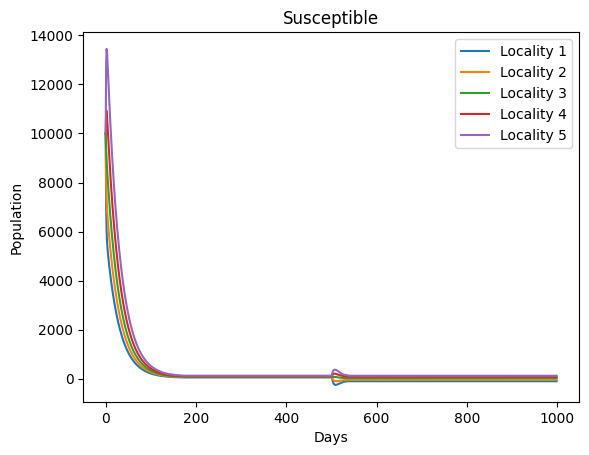

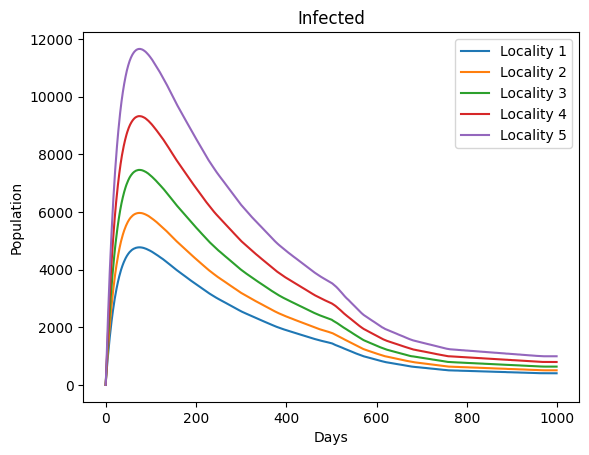

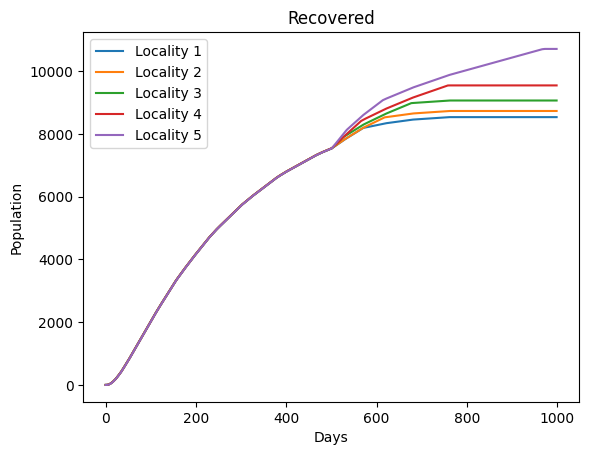

In [113]:
import pandas as pd

# reshaping the data for plotting
sus = (np.array(sus)).reshape(DAYS, 5)
inf = (np.array(inf)).reshape(DAYS, 5)
rec = (np.array(rec)).reshape(DAYS, 5)

sus = pd.DataFrame(sus)
inf = pd.DataFrame(inf)
rec = pd.DataFrame(rec)

#plotting the susceptible population
plt.plot(sus[0], label="Locality 1")
plt.plot(sus[1], label="Locality 2")
plt.plot(sus[2], label="Locality 3")
plt.plot(sus[3], label="Locality 4")
plt.plot(sus[4], label="Locality 5")
plt.title("Susceptible")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.show()

#plotting the infected population
plt.plot(inf[0], label="Locality 1")
plt.plot(inf[1], label="Locality 2")
plt.plot(inf[2], label="Locality 3")
plt.plot(inf[3], label="Locality 4")
plt.plot(inf[4], label="Locality 5")
plt.title("Infected")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.show()

# plotting the recovered population
plt.plot(rec[0], label="Locality 1")
plt.plot(rec[1], label="Locality 2")
plt.plot(rec[2], label="Locality 3")
plt.plot(rec[3], label="Locality 4")
plt.plot(rec[4], label="Locality 5")
plt.title("Recovered")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.show()




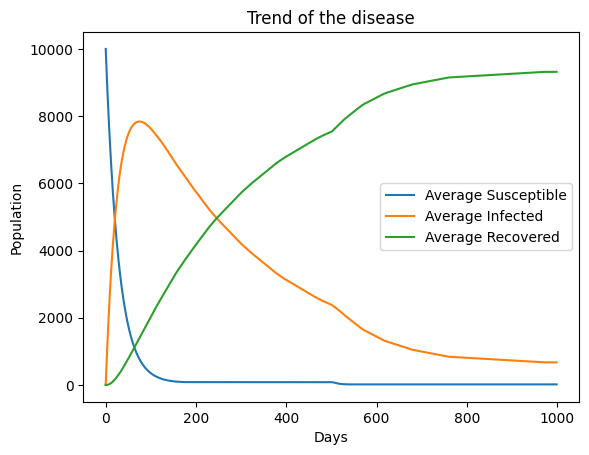

In [114]:
# inshallah boys played well

sus_mean = pd.Series.mean(sus, axis=1)
inf_mean = pd.Series.mean(inf, axis=1)
rec_mean = pd.Series.mean(rec, axis=1)

plt.plot(sus_mean, label="Average Susceptible")
plt.plot(inf_mean, label="Average Infected")
plt.plot(rec_mean, label="Average Recovered")
plt.title("Trend of the disease")
plt.xlabel("Days")
plt.ylabel("Population")
plt.legend()
plt.show()
